In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
file1="c:/temp/Auto.csv"
Auto=pd.read_csv(file1)
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
Auto.head()
#데이터 위의 다섯개

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
Auto.tail()
#데이터 아래 다섯개

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [7]:
Auto.shape
#데이터 구조

(397, 9)

In [8]:
Auto.dtypes
# 데이터 타입
# object: 문자, int: integer 정수

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [10]:
file2="c:/temp/Auto1.xlsx"
Auto1=pd.read_excel(file2)
Auto1

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [11]:
# 간단하게 통계 값 보기
Auto1.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
# 25%: 1사분위값(25백분위값)
# 50%: median 중앙값
# 75%: 3사분위 값

# mpg에 대한 통계 알고싶다.
Auto['mpg'].describe()

count    397.000000
mean      23.515869
std        7.825804
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [14]:
# mpg와 weight 에 대한 통계

Auto[['mpg','weight']].describe()

,mpg,weight
count,397.000000,397.000000
mean,23.515869,2970.261965
std,7.825804,847.904119
min,9.000000,1613.000000
25%,17.500000,2223.000000
50%,23.000000,2800.000000
75%,29.000000,3609.000000
max,46.600000,5140.000000


In [15]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [17]:
# 범주형 변수로 만들기 : astype

# 숫자를 범주로 만들기

Auto['origin']=Auto['origin'].astype('category')
Auto.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower        object
weight             int64
acceleration     float64
year               int64
origin          category
name              object
dtype: object

In [18]:
# 범주가 된 변수 세기 : 빈도표 만들기 : value_counts

Auto['origin'].value_counts()

1    248
3     79
2     70
Name: origin, dtype: int64

In [19]:
Auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


In [20]:
# 범주로 만든 변수까지 다 보이게

Auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,397,397.000000,397.000000,397.000000,397.0,397
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,3.0,304
top,NaN,NaN,NaN,150,NaN,NaN,NaN,1.0,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,248.0,6
mean,23.515869,5.458438,193.532746,NaN,2970.261965,15.555668,75.994962,NaN,NaN
std,7.825804,1.701577,104.379583,NaN,847.904119,2.749995,3.690005,NaN,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.000000,NaN,2223.000000,13.800000,73.000000,NaN,NaN
50%,23.000000,4.000000,146.000000,NaN,2800.000000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,NaN,3609.000000,17.100000,79.000000,NaN,NaN


In [21]:
# 평균, 분산, 표준편차, 최댓값 구하기 : np.mean() / np.var() / np.std() / np.max()

np.mean(Auto['displacement'])

193.53274559193954

In [22]:
np.var(Auto['mpg'])

61.08894212893934

In [23]:
np.std(Auto['mpg'])

7.815941538224255

In [24]:
np.max(Auto['mpg'])

46.6

In [25]:
np.min(Auto['mpg'])

9.0

In [27]:
# 행렬 만들기 : np.array([ , , ])

x=np.array([1,2,3])
x

array([1, 2, 3])

In [28]:
x1=np.array([[1,2,3],[4,5,6],[7,8,9]])
x1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [29]:
# pyhon에서 그리기 : ggplot, plt, sns

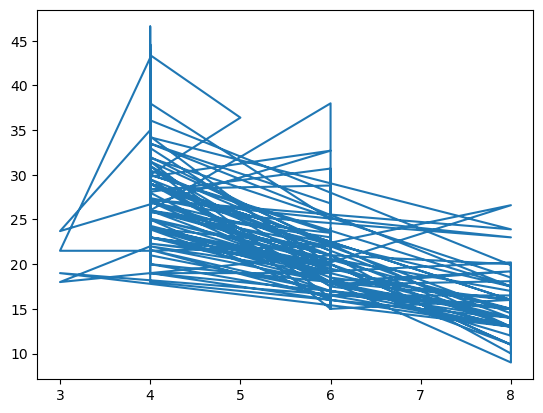

In [31]:
# Scatter Plot 그리기 : plt.plot('x변수','y변수',data=변수 어느 데이터에서)

plt.plot('cylinders','mpg',data=Auto)
plt.show()

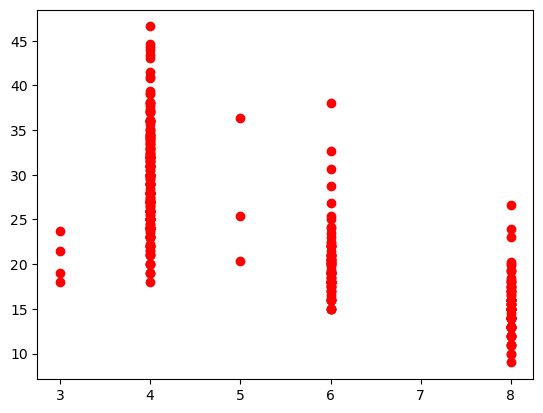

In [33]:
# Scatter Plot 선 말고 점으로 만들기 linestyle='', marker='o'

plt.plot('cylinders','mpg',data=Auto,linestyle='', marker='o', color='red')
plt.show()

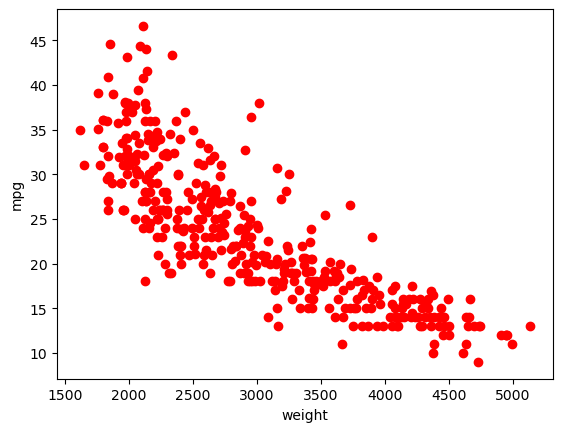

In [35]:
# 축에 이름 보이게 라벨링
# plt.ylabel('변수')
# plt.xlabel('변수')

plt.plot('weight','mpg',data=Auto,linestyle='', marker='o', color='red')
plt.ylabel('mpg')
plt.xlabel('weight')
plt.show()

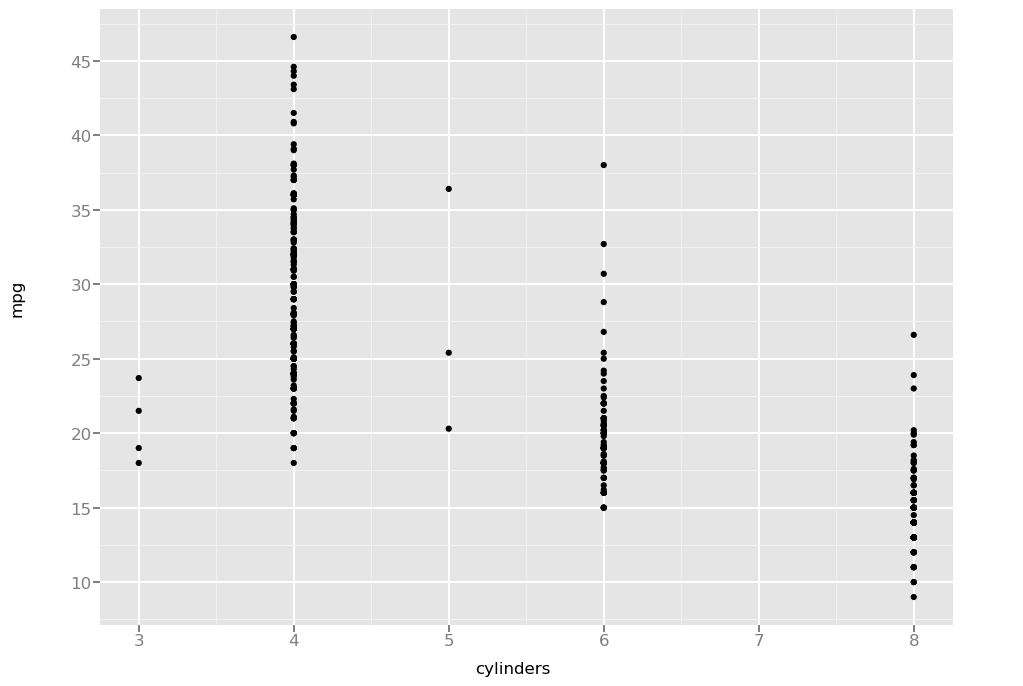

<ggplot: (125368045611)>

In [37]:
# ggplot
# Scatter plot 그리기

from ggplot import *

ggplot(Auto,aes(x='cylinders',y='mpg'))+geom_point()

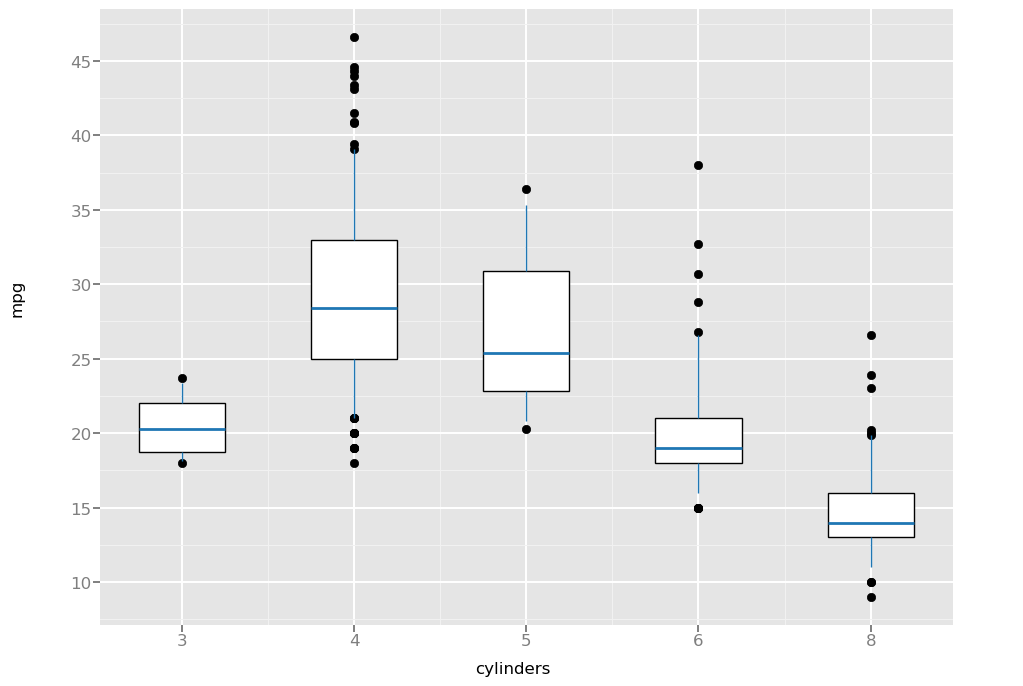

<ggplot: (125367933609)>

In [38]:
# ggplot으로 Box plot 그리기

ggplot(Auto,aes(x='cylinders',y='mpg'))+geom_boxplot()

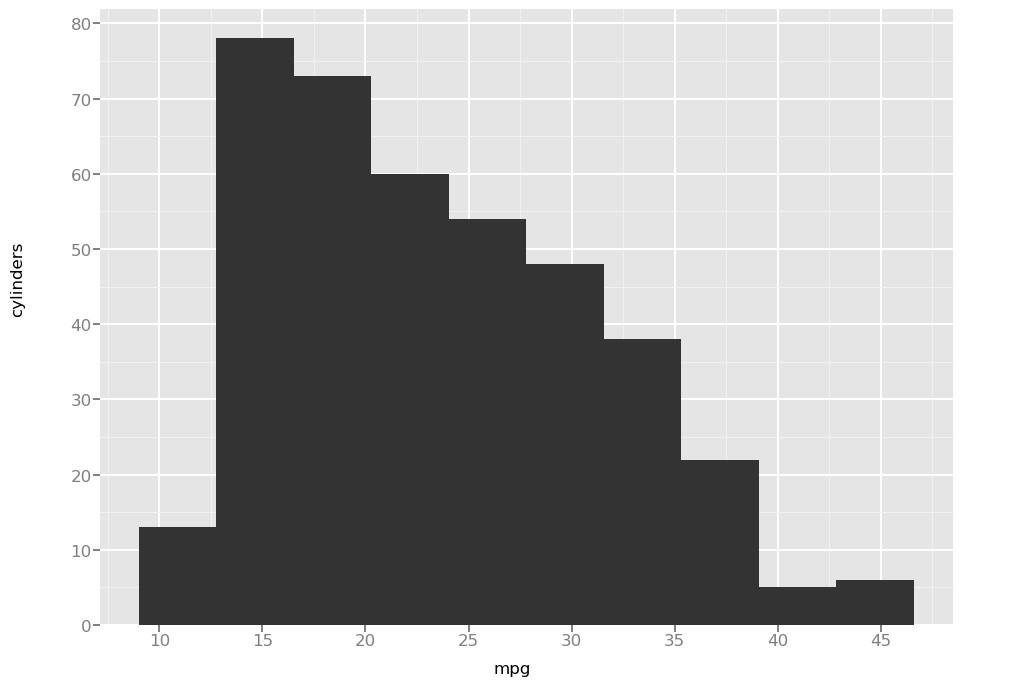

<ggplot: (125368069864)>

In [40]:
# ggplot으로 Histogram 그리기

ggplot(Auto,aes(x='mpg',y='cylinders'))+geom_histogram()

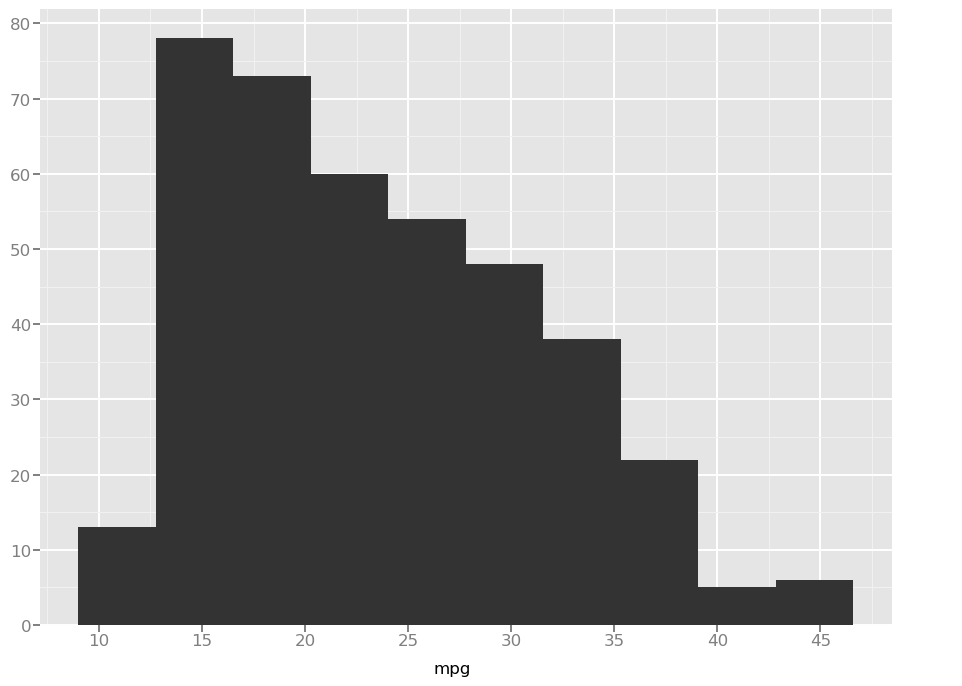

<ggplot: (125368050878)>

In [41]:
# ggplot으로 Histogram 그리기

ggplot(Auto,aes(x='mpg'))+geom_histogram()

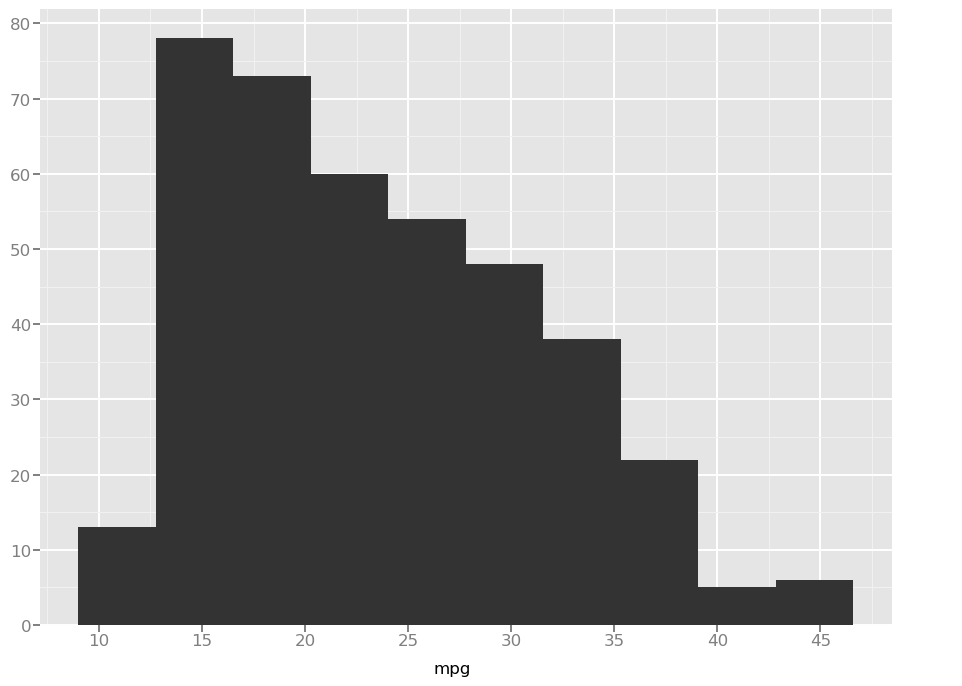

In [46]:
# 그린 그래프 저장하기 
# fig로 그래프 이름 부여하고
# 그래프이름.save(filename='저장위치')

fig1=ggplot(Auto,aes(x='mpg'))+geom_histogram()
fig1.save(filename='c:/temp/histogram.png')

In [47]:
# seaborn : SNS
# time series graph 그리기 
# 시계열그래프

file3="c:/temp/fifa.csv"
fifa=pd.read_csv(file3)
fifa

,Date,ARG,BRA,ESP,FRA,GER,ITA
0,1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1,1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
2,1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
3,1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
4,1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0
...,...,...,...,...,...,...,...
281,2018-02-15,4.0,2.0,6.0,9.0,1.0,14.0
282,2018-03-15,4.0,2.0,6.0,9.0,1.0,14.0
283,2018-04-12,5.0,2.0,8.0,7.0,1.0,20.0
284,2018-05-17,5.0,2.0,8.0,7.0,1.0,20.0


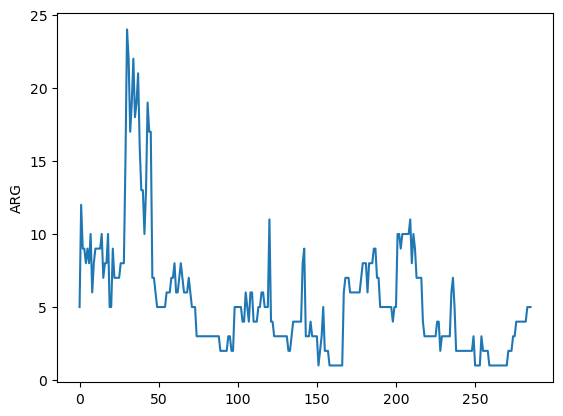

In [49]:
# lineplot 그리기 
# sns.lineplot(data=데이터이름['변수'])

sns.lineplot(data=fifa['ARG'])
plt.show()

In [50]:
# time series data의 날짜 변수를 .. 뭐라 쓰지
# index_col="변수", parse_dates=True

fifa=pd.read_csv(file3, index_col="Date", parse_dates=True)
fifa

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0
...,...,...,...,...,...,...
2018-02-15,4.0,2.0,6.0,9.0,1.0,14.0
2018-03-15,4.0,2.0,6.0,9.0,1.0,14.0
2018-04-12,5.0,2.0,8.0,7.0,1.0,20.0


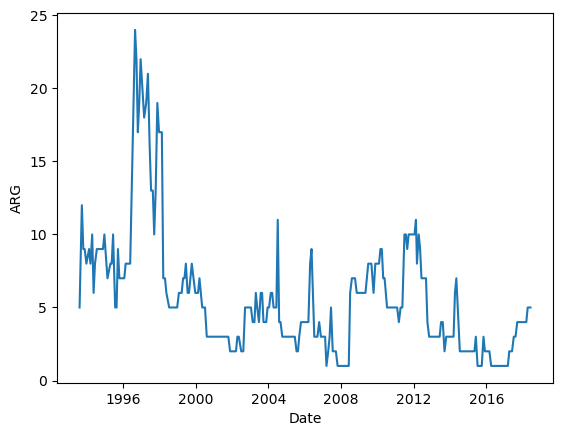

In [51]:
sns.lineplot(data=fifa['ARG'])
plt.show()

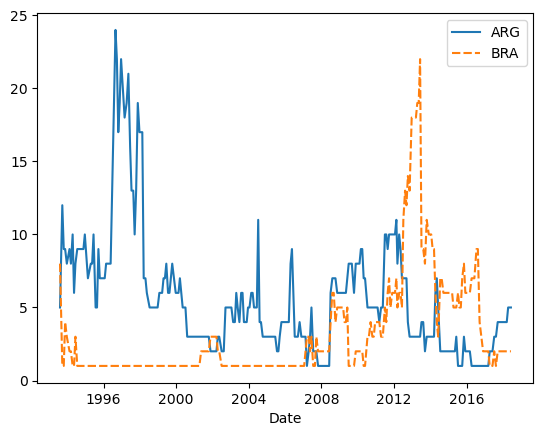

In [53]:
sns.lineplot(data=fifa[['ARG','BRA']])
plt.show()

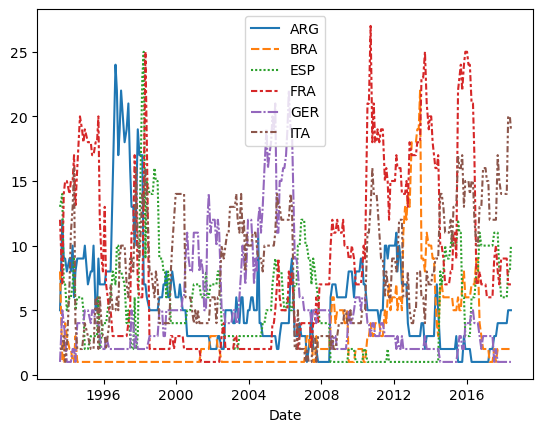

In [54]:
sns.lineplot(data=fifa)
plt.show()